(psk)=
# Phase-shift keying

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sdr

%config InlineBackend.print_figure_kwargs = {"facecolor" : "w"}
# %matplotlib widget

In the {obj}`sdr` library, phase-shift keying modulation is available in the {obj}`sdr.PSK` class.

In [2]:
def analyze_psk(order, esn0):
    # Create a PSK modulation object
    psk = sdr.PSK(order)

    # Generate random decimal symbols
    s = np.random.randint(0, order, 100_000)

    # Modulate decimal symbols to complex symbols
    x = psk.modulate(s)

    # Add AWGN to complex symbols to achieve desired Es/N0
    x_hat = sdr.awgn(x, esn0)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sdr.plot.constellation(x_hat)
    plt.subplot(1, 2, 2)
    sdr.plot.constellation(x_hat, bins=75, heatmap=True)
    plt.suptitle(f"{order}-PSK constellation at {esn0} dB $E_s/N_0$")
    plt.tight_layout()
    plt.show()

## Constellations

### BPSK

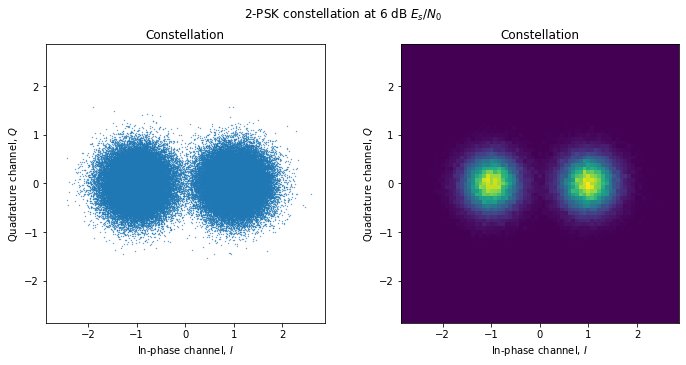

In [3]:
analyze_psk(2, 6)

### QPSK

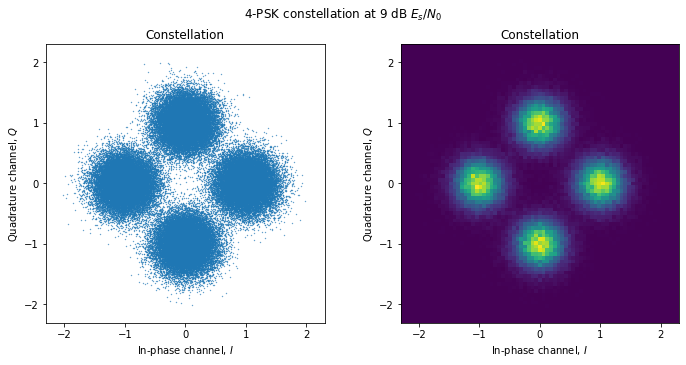

In [4]:
analyze_psk(4, 9)

### 8-PSK

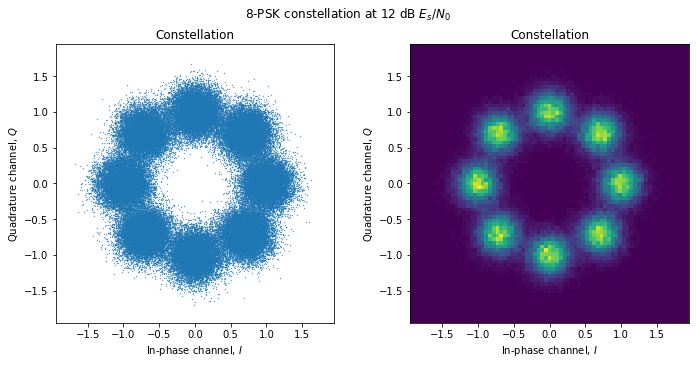

In [5]:
analyze_psk(8, 12)

### 16-PSK

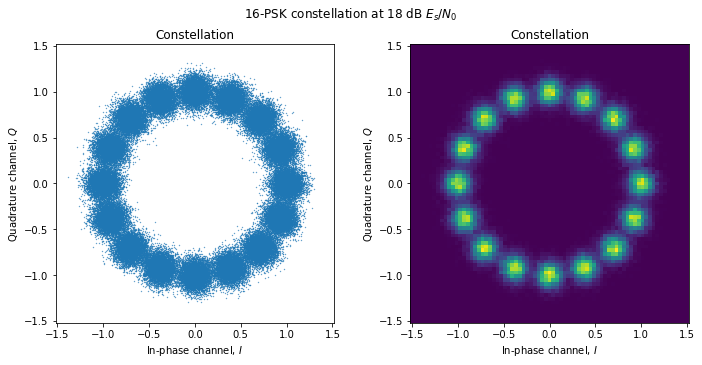

In [6]:
analyze_psk(16, 18)